# Setup and Context

<img src="https://i.imgur.com/gugIA5r.png" width=700>

### Introduction

Dr Ignaz Semmelweis was a Hungarian physician born in 1818 who worked in the Vienna General Hospital. In the past people thought of illness as caused by "bad air" or evil spirits. But in the 1800s Doctors started looking more at anatomy, doing autopsies and started making arguments based on data. Dr Semmelweis suspected that something was going wrong with the procedures at Vienna General Hospital. Semmelweis wanted to figure out why so many women in maternity wards were dying from childbed fever (i.e., [puerperal fever](https://en.wikipedia.org/wiki/Postpartum_infections)).

<img src=https://i.imgur.com/lSyNUwR.png width=700>

Today you will become Dr Semmelweis. This is your office 👆. You will step into Dr Semmelweis' shoes and analyse the same data collected from 1841 to 1849.

### The Data Source

Dr Semmelweis published his research in 1861. I found the scanned pages of the [full text with the original tables in German](http://www.deutschestextarchiv.de/book/show/semmelweis_kindbettfieber_1861), but an excellent [English translation can be found here](http://graphics8.nytimes.com/images/blogs/freakonomics/pdf/the%20etiology,%20concept%20and%20prophylaxis%20of%20childbed%20fever.pdf).

<img src=https://i.imgur.com/6HfLtaC.png width=500>

### Import Statements

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

### Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

# Create locators for ticks on the time axis
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

### Read the Data

In [3]:
df_yearly = pd.read_csv('annual_deaths_by_clinic.csv')
# parse_dates avoids DateTime conversion later
df_monthly = pd.read_csv('monthly_deaths.csv', 
                      parse_dates=['date'])

# Preliminary Data Exploration

**Challenge**: Check out these two DataFrames ☝️. 
* What is the shape of df_yearly and df_monthly? How many rows and columns?
* What are the column names?
* Which years are included in the dataset?
* Are there any NaN values or duplicates?
* What were the average number of births that took place per month?
* What were the average number of deaths that took place per month?

In [4]:
print("The shape of df_yearly is:")
df_yearly.shape

The shape of df_yearly is:


(12, 4)

In [5]:
print('df_yearly has the following columns:')
df_yearly.columns

df_yearly has the following columns:


Index(['year', 'births', 'deaths', 'clinic'], dtype='object')

In [6]:
print('The shape of df_monthly is:')
df_monthly.shape

The shape of df_monthly is:


(98, 3)

In [7]:
print('df_monthly has the following columns:')
df_monthly.columns

df_monthly has the following columns:


Index(['date', 'births', 'deaths'], dtype='object')

In [8]:
print(f'df_yearly is from {df_yearly.year.min()} - {df_yearly.year.max()}')
print(f'df_monthly is from {df_monthly.date.min()} - {df_monthly.date.max()}')

df_yearly is from 1841 - 1846
df_monthly is from 1841-01-01 00:00:00 - 1849-03-01 00:00:00


### Check for Nan Values and Duplicates

In [9]:
print(f'The number of missing values in df_yearly is {df_yearly.isna().sum().sum()}')

The number of missing values in df_yearly is 0


In [10]:
print(f'The number of missing values in df_monthly is {df_monthly.isna().values.sum()}')

The number of missing values in df_monthly is 0


In [11]:
print(f'Are there any duplicate values in df_yearly? {df_yearly.duplicated().any()}')

Are there any duplicate values in df_yearly? False


In [12]:
print(f'Are there any duplicate values in df_monthly? {df_monthly.duplicated().any()}')

Are there any duplicate values in df_monthly? False


### Descriptive Statistics

In [13]:
df_yearly.describe()

,year,births,deaths
count,12.00,12.00,12.00
mean,"1,843.50","3,152.75",223.33
std,1.78,449.08,145.38
min,"1,841.00","2,442.00",66.00
25%,"1,842.00","2,901.75",100.25
50%,"1,843.50","3,108.50",219.50
75%,"1,845.00","3,338.25",263.50
max,"1,846.00","4,010.00",518.00


### Percentage of Women Dying in Childbirth

**Challenge**: How dangerous was childbirth in the 1840s in Vienna? 

* Using the annual data, calculate the percentage of women giving birth who died throughout the 1840s at the hospital.


In comparison, the United States recorded 18.5 maternal deaths per 100,000 or 0.018% in 2013 [(source).](
https://en.wikipedia.org/wiki/Maternal_death#:~:text=The%20US%20has%20the%20%22highest,17.8%20per%20100%2C000%20in%202009)

In [14]:
round(df_yearly.deaths.sum() / df_yearly.births.sum() * 100, 3)

7.084

# Visualise the Total Number of Births 🤱 and Deaths 💀 over Time

### Plot the Monthly Data on Twin Axes

**Challenge**: Create a [Matplotlib chart](https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.plot.html) with twin y-axes. It should look something like this:

<img src=https://i.imgur.com/F9DOJxx.png width=700>

* Format the x-axis using locators for the years and months (Hint: we did this in the Google Trends notebook)
* Set the range on the x-axis so that the chart lines touch the y-axes
* Add gridlines
* Use `skyblue` and `crimson` for the line colours
* Use a dashed line style for the number of deaths
* Change the line thickness to 3 and 2 for the births and deaths respectively. 
* Do you notice anything in the late 1840s?

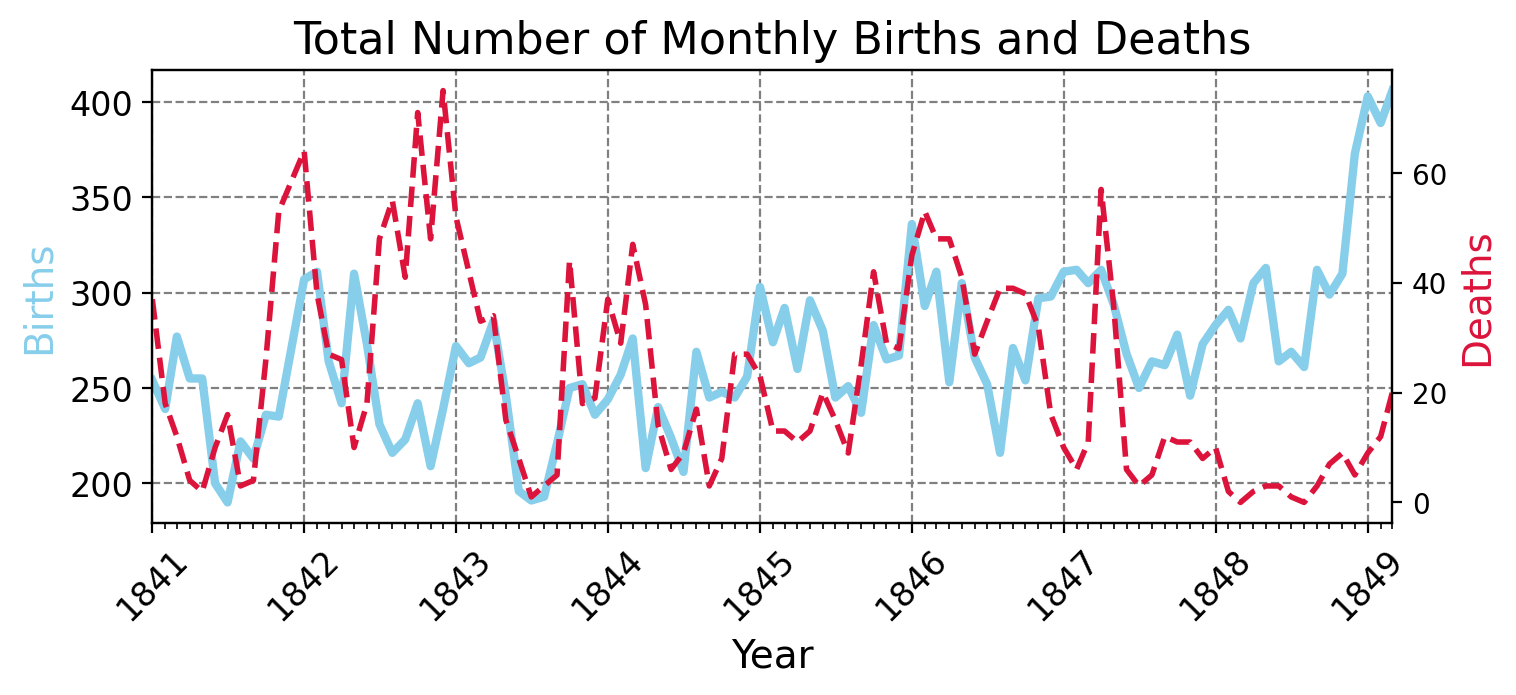

In [15]:
# Style the plot
plt.figure(figsize=(8,3), dpi=200)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.title('Total Number of Monthly Births and Deaths', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Births', fontsize=14, color='skyblue')

# Create 2 y-axes
ax1 = plt.gca()
ax2 = ax1.twinx()
ax2.set_ylabel('Deaths', fontsize=14, color='crimson')

# Create ticks for the x axis
ax2.xaxis.set_major_locator(years)
ax2.xaxis.set_minor_locator(months)
ax2.xaxis.set_major_formatter(years_fmt)

# Add gridlines
ax1.grid(True, linestyle='--', color='grey')

# Set the range
ax1.set_xlim(df_monthly.date.min(), df_monthly.date.max())


# Plot the data
ax1.plot(df_monthly.date, df_monthly.births, color='skyblue', linewidth=3)
ax2.plot(df_monthly.date, df_monthly.deaths, color='crimson', linewidth=2, linestyle='--')
plt.show()

# The Yearly Data Split by Clinic

Now let's look at the annual data instead. 

**Challenge**: Use plotly to create line charts of the births and deaths of the two different clinics at the Vienna General Hospital. 
* Which clinic is bigger or more busy judging by the number of births?
* Has the hospital had more patients over time? 
* What was the highest number of deaths recorded in clinic 1 and clinic 2?

In [16]:
line = px.line(df_yearly, x='year', y='births', color='clinic', title='Annual Births by Clinic')
line.show()

### Calculate the Proportion of Deaths at Each Clinic

**Challenge**: Calculate the proportion of maternal deaths per clinic. That way we can compare like with like. 
* Work out the percentage of deaths for each row in the `df_yearly` DataFrame by adding a column called "pct_deaths". 
* Calculate the average maternal death rate for clinic 1 and clinic 2 (i.e., the total number of deaths per the total number of births).
* Create another plotly line chart to see how the percentage varies year over year with the two different clinics.
* Which clinic has a higher proportion of deaths?
* What is the highest monthly death rate in clinic 1 compared to clinic 2?

In [17]:
df_yearly['pct_deaths'] = df_yearly.deaths / df_yearly.births * 100
df_yearly

,year,births,deaths,clinic,pct_deaths
0,1841,3036,237,clinic 1,7.81
1,1842,3287,518,clinic 1,15.76
2,1843,3060,274,clinic 1,8.95
3,1844,3157,260,clinic 1,8.24
4,1845,3492,241,clinic 1,6.90
5,1846,4010,459,clinic 1,11.45
6,1841,2442,86,clinic 2,3.52
7,1842,2659,202,clinic 2,7.60
8,1843,2739,164,clinic 2,5.99
9,1844,2956,68,clinic 2,2.30


In [18]:
clinic1 = df_yearly[df_yearly.clinic == 'clinic 1']
clinic2 = df_yearly[df_yearly.clinic == 'clinic 2']

percent_deaths_clinic1 = clinic1.deaths.sum() / clinic1.births.sum() * 100
percent_deaths_clinic2 = clinic2.deaths.sum() / clinic2.births.sum() * 100

print(f'The average death rate in Clinic 1 is {percent_deaths_clinic1:.3}%, and in Clinic 2 is {percent_deaths_clinic2:.3}%.')

The average death rate in Clinic 1 is 9.92%, and in Clinic 2 is 3.88%.


### Plotting the Proportion of Yearly Deaths by Clinic

In [19]:
line3 = px.line(df_yearly, x='year', y='pct_deaths', color='clinic', title='Annual Percentage of Deaths by Clinic')
line3.show()

At first, Dr Semmelweis thought that the position of the women giving birth was the issue. In clinic 2, the midwives' clinic, women gave birth on their sides. In the doctors' clinic, women gave birth on their backs. So, Dr. Semmelweis, had women in the doctors' clinic give birth on their sides. However, this had no effect on the death rate.

Next, Dr Semmelweis noticed that whenever someone on the ward died, a priest would walk through clinic 1, past the women's beds ringing a bell 🔔. Perhaps the priest and the bell ringing terrified the women so much after birth that they developed a fever, got sick and died. Dr Semmelweis had the priest change his route and stop ringing the bell 🔕. Again, this had no effect.

At this point, Dr Semmelweis was so frustrated he went on holiday to Venice. Perhaps a short break would clear his head. When Semmelweis returned from his vacation, he was told that one of his colleagues, a pathologist, had fallen ill and died. His friend had pricked his finger while doing an autopsy on a woman who had died from childbed fever and subsequently got very sick himself and died. 😮

Looking at the pathologist's symptoms, Semmelweis realised the pathologist died from the same thing as the women he had autopsied.  This was his breakthrough: anyone could get sick from childbed fever, not just women giving birth!

This is what led to Semmelweis' new theory. Perhaps there were little pieces or particles of a corpse that the doctors and medical students were getting on their hands while dissecting the cadavers during an autopsy. And when the doctors delivered the babies in clinic 1, these particles would get inside the women giving birth who would then develop the disease and die.



# The Effect of Handwashing

In June 1846, Dr Semmelweis ordered everyone on his medical staff to start cleaning their hands and instruments not just with soap and water but with a chlorine solution (he didn't know it at the time, but chlorine is an amazing disinfectant). The reason Dr Semmelweis actually chose the chlorine was that he wanted to get rid of any smell on doctors' hands after an autopsy. No one knew anything about bacteria, germs or viruses at the time.

In [20]:
# Date when handwashing was made mandatory
handwashing_start = pd.to_datetime('1847-06-01')

**Challenge**: 
* Add a column called "pct_deaths" to `df_monthly` that has the percentage of deaths per birth for each row. 
* Create two subsets from the `df_monthly` data: before and after Dr Semmelweis ordered washing hand.
* Calculate the average death rate prior to June 1947.
* Calculate the average death rate after June 1947.

In [21]:
df_monthly['pct_deaths'] = df_monthly.deaths / df_monthly.births * 100
df_monthly

,date,births,deaths,pct_deaths
0,1841-01-01,254,37,14.57
1,1841-02-01,239,18,7.53
2,1841-03-01,277,12,4.33
3,1841-04-01,255,4,1.57
4,1841-05-01,255,2,0.78
...,...,...,...,...
93,1848-11-01,310,9,2.90
94,1848-12-01,373,5,1.34
95,1849-01-01,403,9,2.23
96,1849-02-01,389,12,3.08


In [22]:
before_handwashing = df_monthly[df_monthly.date < handwashing_start]
after_handwashing = df_monthly[df_monthly.date >= handwashing_start]

print(f'The average death rate before handwashing was: {before_handwashing.deaths.sum() / before_handwashing.births.sum() * 100:.4}%.')
print(f'The average death rate after handwashing was: {after_handwashing.deaths.sum() / after_handwashing.births.sum() * 100:.3}%.')

The average death rate before handwashing was: 10.53%.
The average death rate after handwashing was: 2.15%.


### Calculate a Rolling Average of the Death Rate

**Challenge**: Create a DataFrame that has the 6 month rolling average death rate prior to mandatory handwashing.

*Hint*: You'll need to set the dates as the index in order to avoid the date column being dropped during the calculation.

In [23]:
rolling_before_handwashing = before_handwashing.set_index('date')
rolling_before_handwashing = rolling_before_handwashing.pct_deaths.rolling(window=6).mean()
rolling_before_handwashing

date
1841-01-01     NaN
1841-02-01     NaN
1841-03-01     NaN
1841-04-01     NaN
1841-05-01     NaN
              ... 
1847-01-01   11.13
1847-02-01    8.44
1847-03-01    6.64
1847-04-01    7.19
1847-05-01    7.44
Name: pct_deaths, Length: 76, dtype: float64

### Highlighting Subsections of a Line Chart

**Challenge**: Copy-paste and then modify the Matplotlib chart from before to plot the monthly death rates (instead of the total number of births and deaths). The chart should look something like this:

<img src=https://i.imgur.com/X6TQe0R.png width=500>

* Add 3 seperate lines to the plot: the death rate before handwashing, after handwashing, and the 6-month moving average before handwashing.
* Show the monthly death rate before handwashing as a thin dashed black line. 
* Show the moving average as a thicker, crimson line.
* Show the rate after handwashing as a skyblue line with round markers. 
* Look at the [code snippet in the documentation to see how you can add a legend](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.legend.html) to the chart.

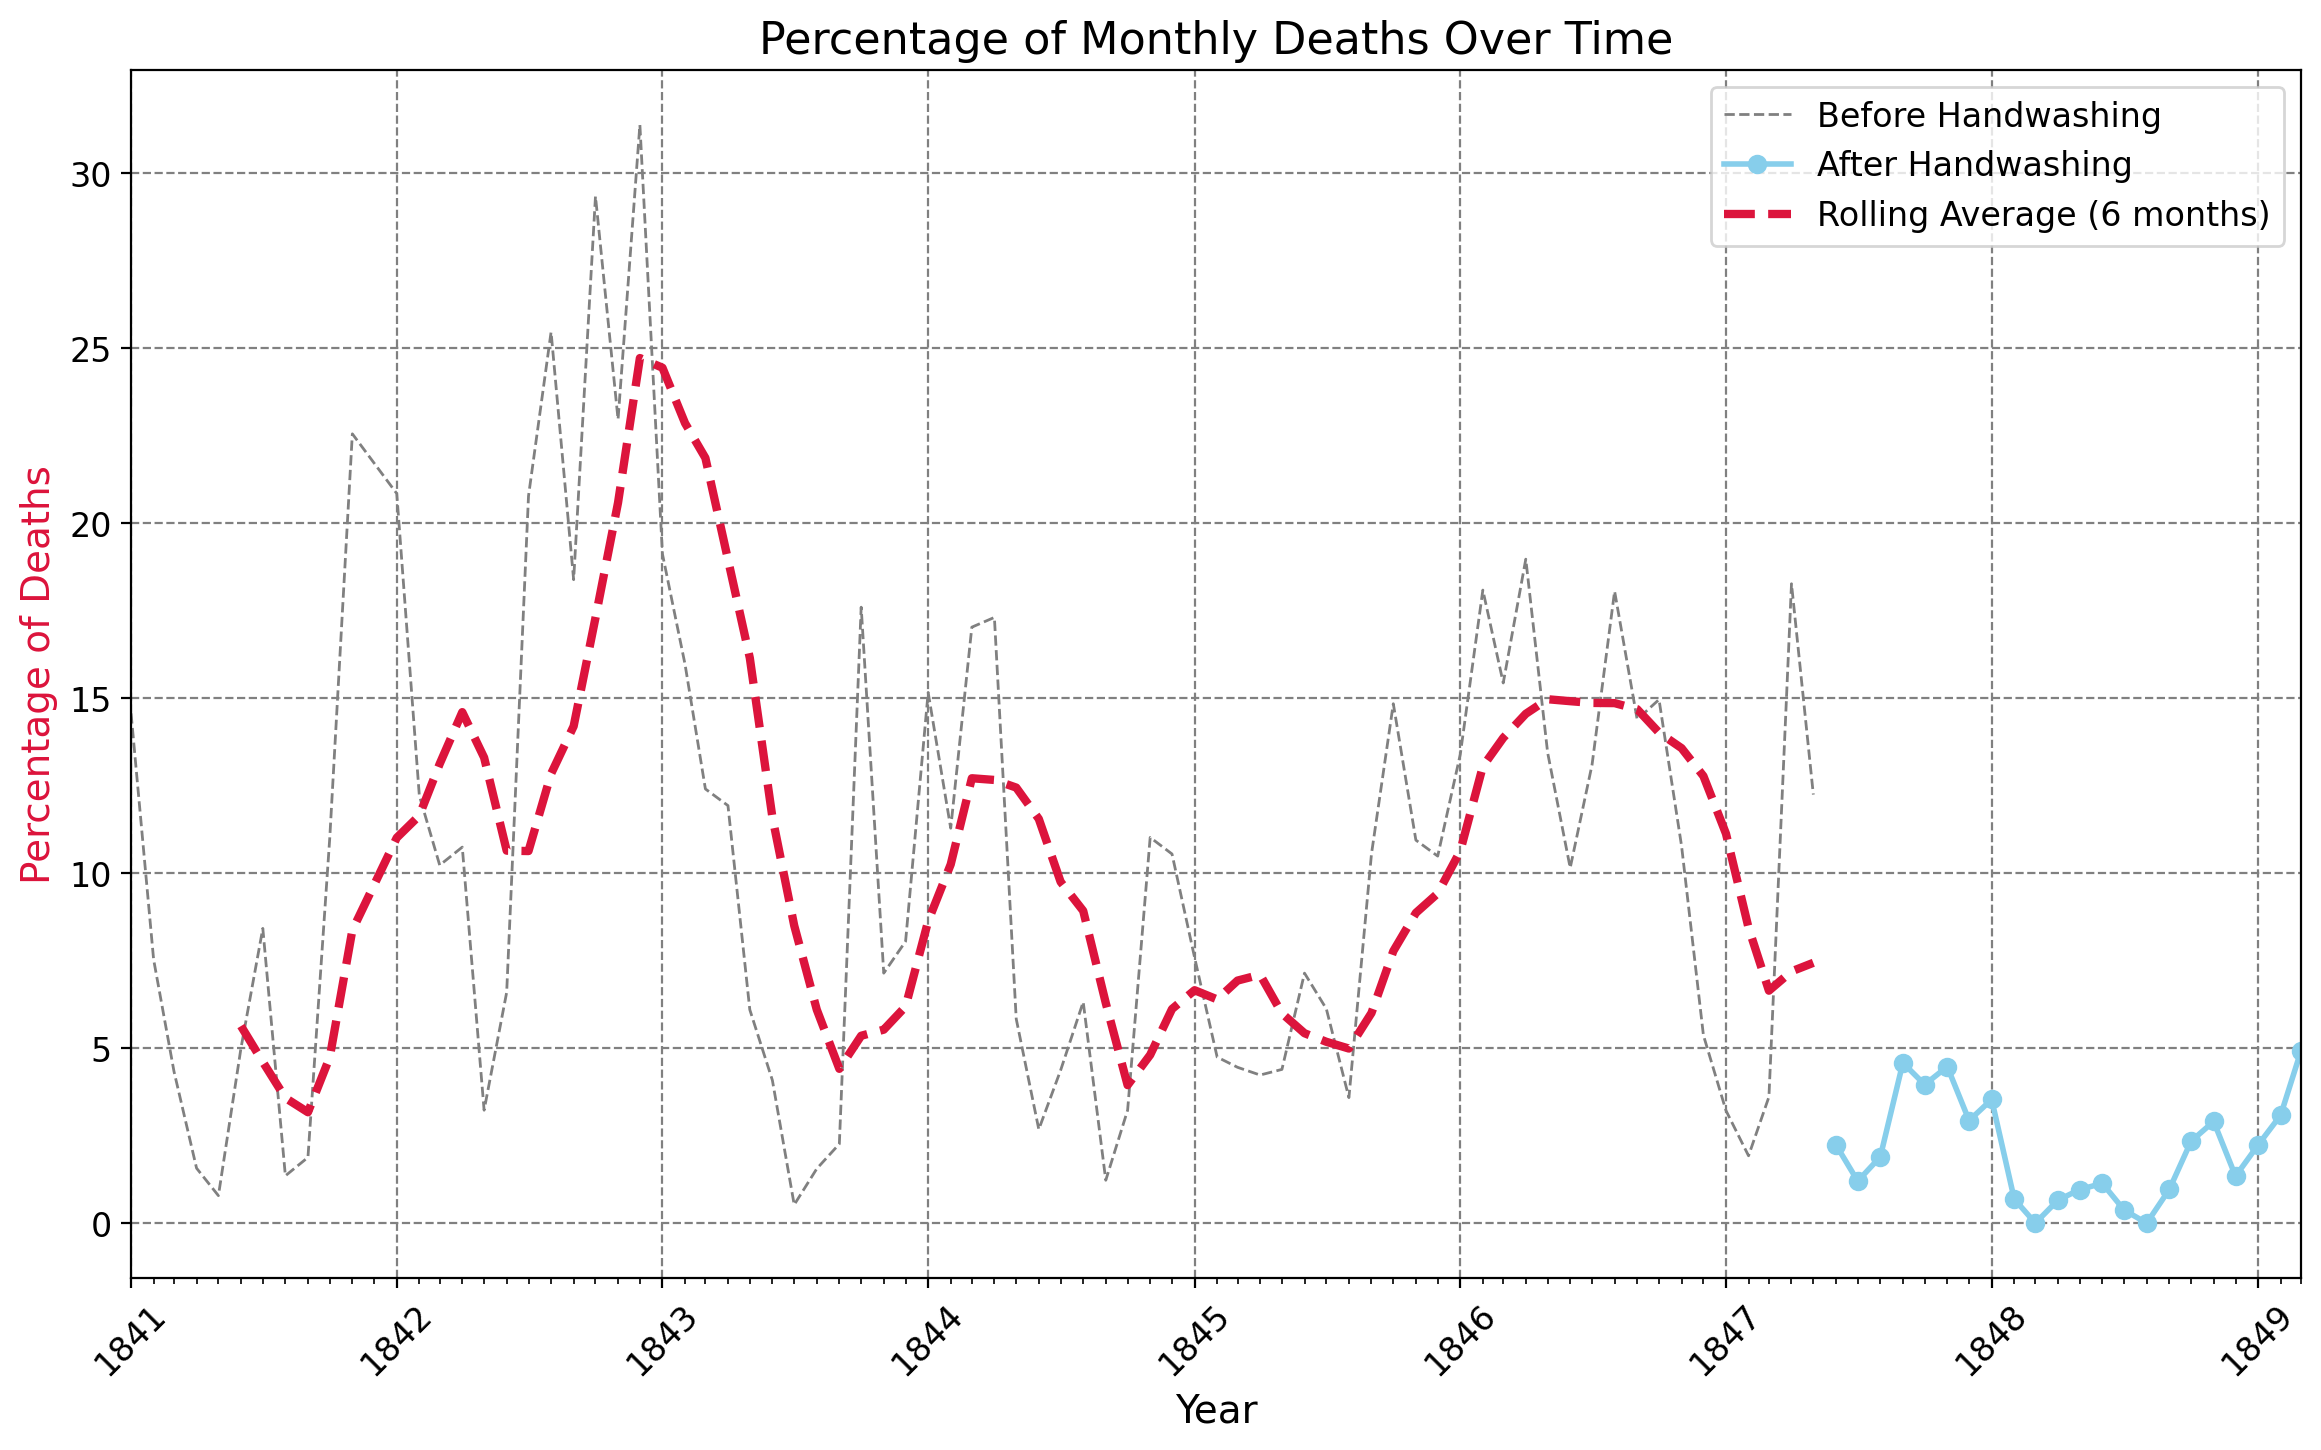

In [24]:
# Style the plot
plt.figure(figsize=(14, 8), dpi=200)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.title('Percentage of Monthly Deaths Over Time', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Percentage of Deaths', fontsize=14, color='crimson')

# Get the current axis
ax = plt.gca()

# Create ticks for the x axis
ax.xaxis.set_major_locator(years)
ax.xaxis.set_minor_locator(months)
ax.xaxis.set_major_formatter(years_fmt)

ax.set_xlim(df_monthly.date.min(), df_monthly.date.max())

# Add gridlines
plt.grid(True, linestyle='--', color='grey')

# Set the range
ax.set_xlim(df_monthly.date.min(), df_monthly.date.max())


# Plot the data
plt.plot(before_handwashing.date,
         before_handwashing.pct_deaths,
         color='grey',
         linewidth=1,
         linestyle='dashed',
         label='Before Handwashing')
plt.plot(after_handwashing.date,
         after_handwashing.pct_deaths,
         color='skyblue',
         linewidth=2,
         marker='o',
         label='After Handwashing')
plt.plot(rolling_before_handwashing.index,
         rolling_before_handwashing,
         color='crimson',
         linewidth=3,
         linestyle='--',
         label='Rolling Average (6 months)')
# Show the legend
plt.legend(loc='upper right', fontsize=12)
plt.show()


### Statistics - Calculate the Difference in the Average Monthly Death Rate

**Challenge**:
* What was the average percentage of monthly deaths before handwashing? 
* What was the average percentage of monthly deaths after handwashing was made obligatory?
* By how much did handwashing reduce the average chance of dying in childbirth in percentage terms?
* How do these numbers compare to the average for all the 1840s that we calculated earlier? 
* How many times lower are the chances of dying after handwashing compared to before?

In [25]:
avg_perc_before = before_handwashing.pct_deaths.mean()
avg_perc_after = after_handwashing.pct_deaths.mean()
print(f'The average percentage of monthly deaths before handwashing was: {avg_perc_before:.3}%')
print(f'The average percentage of monthly deaths after handwashing was: {avg_perc_after:.3}%')
print(f'The decrease in percentage of monthly deaths is: {avg_perc_before - avg_perc_after:.3}%.')
print(f'That means the chances of dying have reduced by {round(avg_perc_before / avg_perc_after)} times.')

The average percentage of monthly deaths before handwashing was: 10.5%
The average percentage of monthly deaths after handwashing was: 2.11%
The decrease in percentage of monthly deaths is: 8.4%.
That means the chances of dying have reduced by 5 times.


### Use Box Plots to Show How the Death Rate Changed Before and After Handwashing

**Challenge**: 
* Use [NumPy's `.where()` function](https://numpy.org/doc/stable/reference/generated/numpy.where.html) to add a column to `df_monthly` that shows if a particular date was before or after the start of handwashing. 
* Then use plotly to create box plot of the data before and after handwashing. 
* How did key statistics like the mean, max, min, 1st and 3rd quartile changed as a result of the new policy?



In [26]:
df_monthly['washing_hands'] = np.where(df_monthly.date <= handwashing_start, 'No', 'Yes')

In [27]:
box = px.box(df_monthly, x='washing_hands', y='pct_deaths', color='washing_hands')
box.update_layout(xaxis_title='Washing Hands?',
                  yaxis_title='Percentage of Deaths',
                  title='How Have The Stats Changed With Handwashing?')

### Use Histograms to Visualise the Monthly Distribution of Outcomes

**Challenge**: Create a [plotly histogram](https://plotly.com/python/histograms/) to show the monthly percentage of deaths. 

* Use docs to check out the available parameters. Use the [`color` parameter](https://plotly.github.io/plotly.py-docs/generated/plotly.express.histogram.html) to display two overlapping histograms.
* The time period of handwashing is shorter than not handwashing. Change `histnorm` to `percent` to make the time periods comparable. 
* Make the histograms slighlty transparent
* Experiment with the number of bins on the histogram. Which number work well in communicating the range of outcomes?
* Just for fun, display your box plot on the top of the histogram using the `marginal` parameter. 

In [28]:
histogram = px.histogram(df_monthly,
                         x='pct_deaths',
                         color='washing_hands',
                         histnorm='percent',
                         opacity=0.6,
                         barmode='overlay',
                         nbins=30,
                         marginal='box'
                         )
histogram.update_layout(xaxis_title='Percentage of Deaths',
                        yaxis_title='Count')


Now, we have only about 98 data points or so, so our histogram looks a bit jagged. It's not a smooth bell-shaped curve. However, we can estimate what the distribution would look like with a Kernel Density Estimate (KDE).

### Use a Kernel Density Estimate (KDE) to visualise a smooth distribution

**Challenge**: Use [Seaborn's `.kdeplot()`](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) to create two kernel density estimates of the `pct_deaths`, one for before handwashing and one for after. 

* Use the `shade` parameter to give your two distributions different colours. 
* What weakness in the chart do you see when you just use the default parameters?
* Use the `clip` parameter to address the problem. 


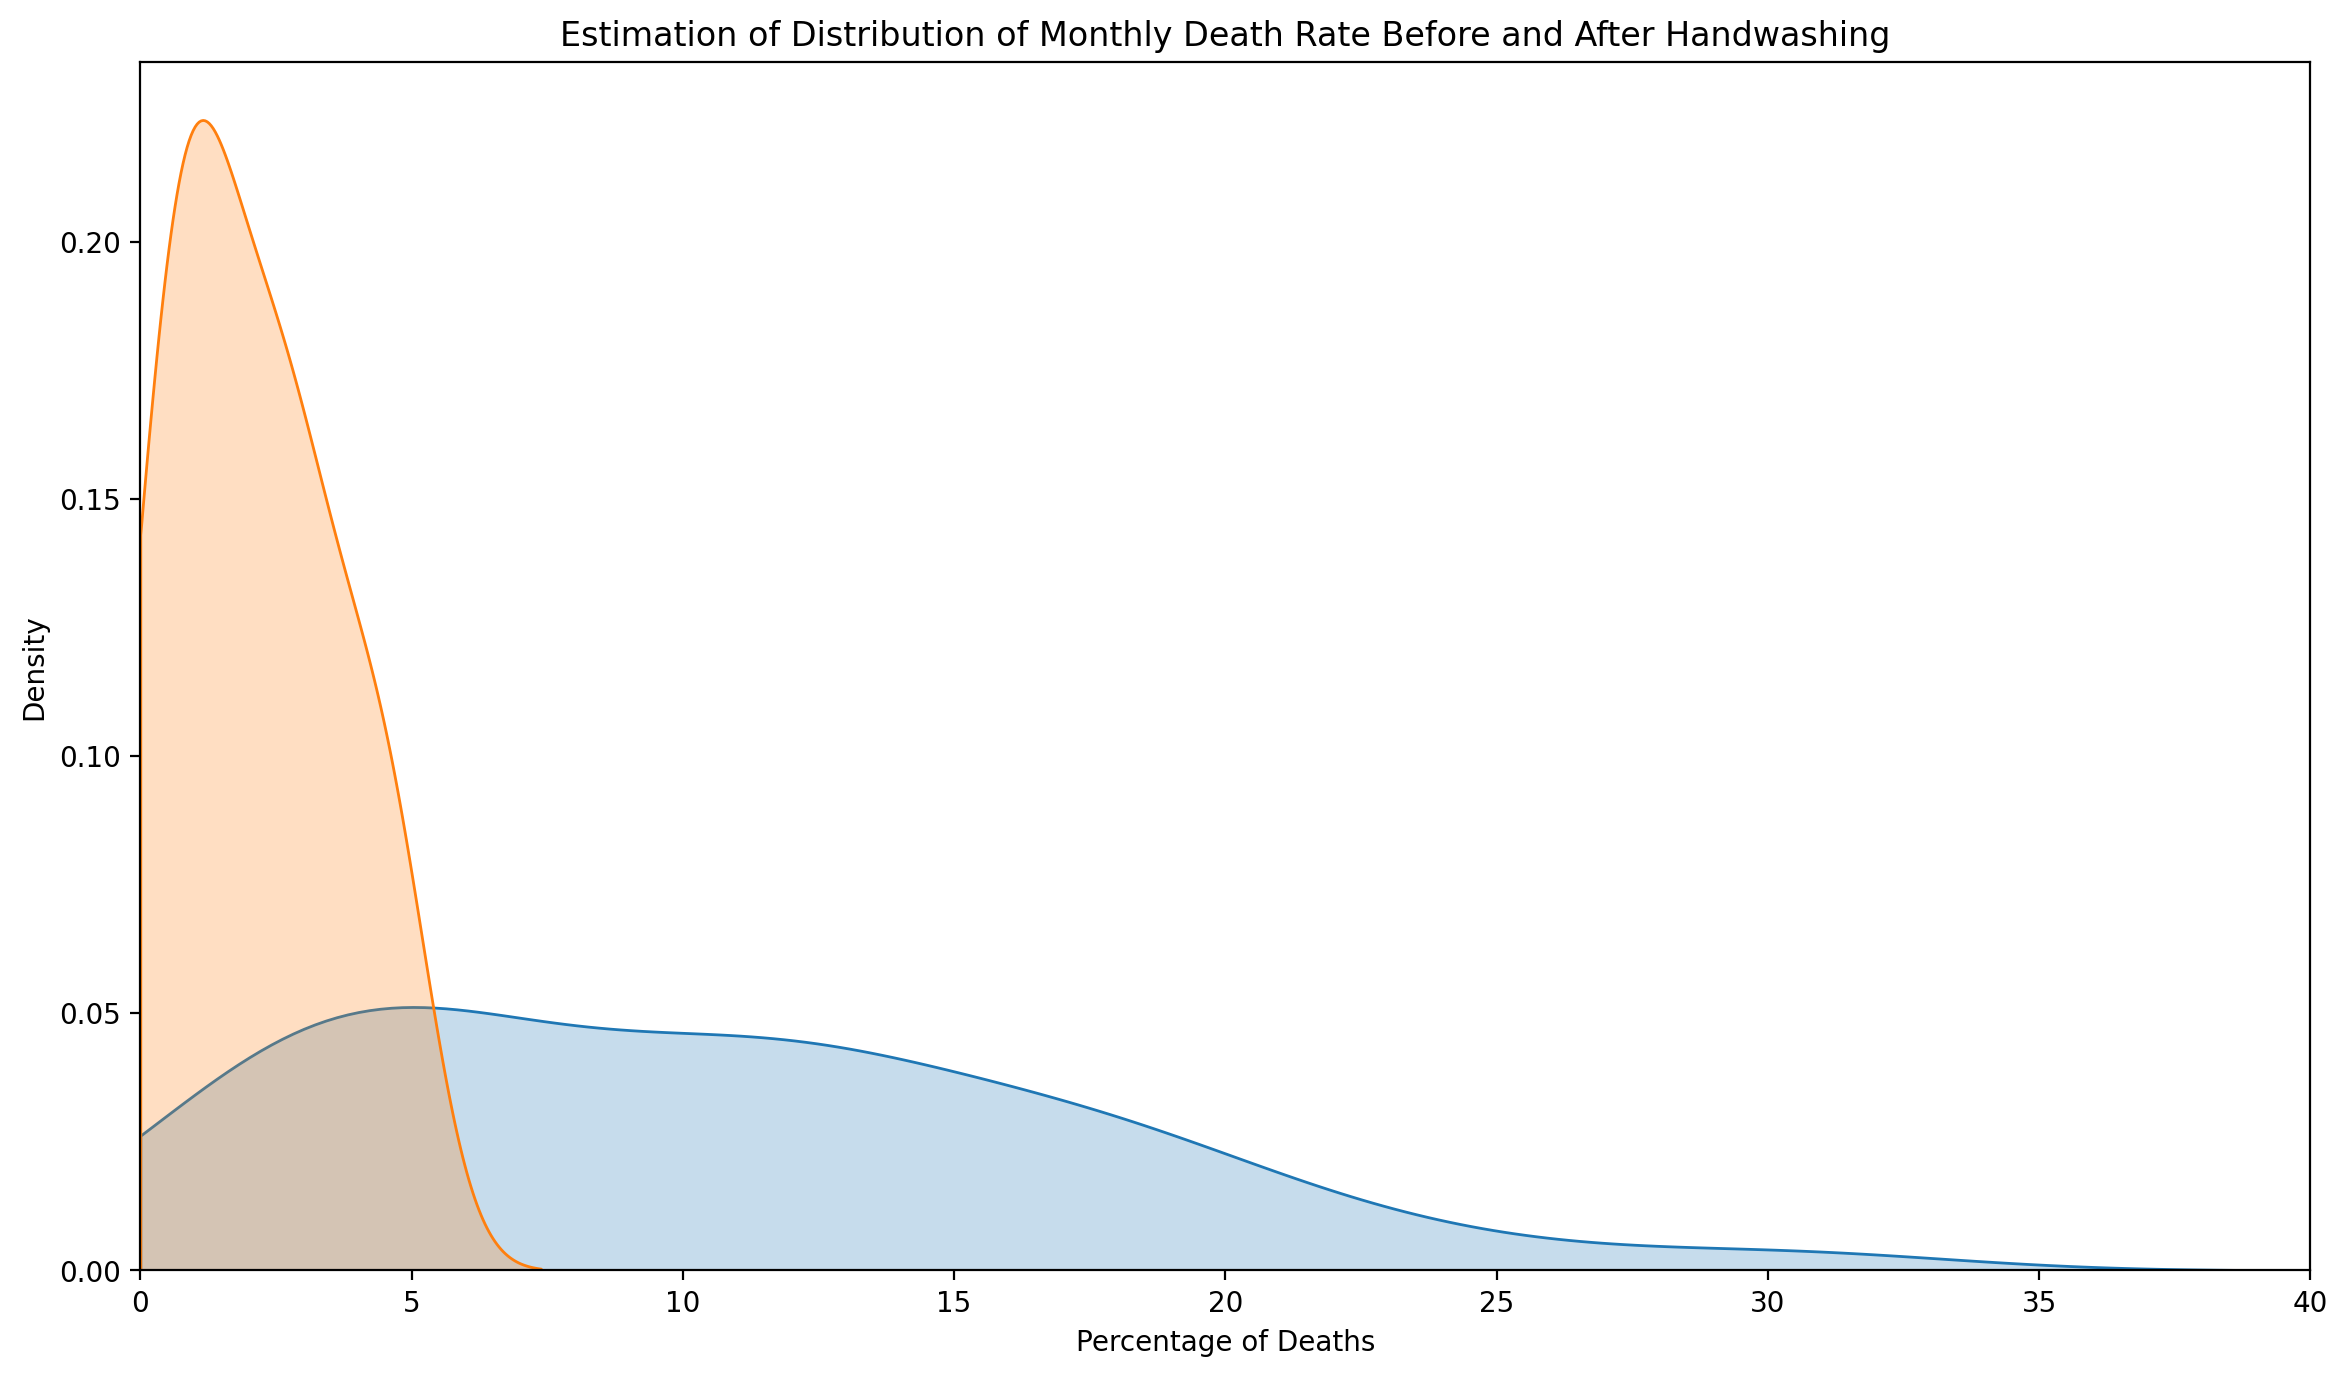

In [29]:
plt.figure(figsize=(14, 8), dpi=200)
# By default the distribution estimate includes a negative death rate!
sns.kdeplot(before_handwashing.pct_deaths, shade=True, clip=(0, 40))
sns.kdeplot(after_handwashing.pct_deaths, shade=True, clip=(0, 10))
plt.title('Estimation of Distribution of Monthly Death Rate Before and After Handwashing')
plt.xlim(0, 40)
plt.xlabel('Percentage of Deaths')
plt.show()

Now that we have an idea of what the two distributions look like, we can further strengthen our argument for handwashing by using a statistical test. We can test whether our distributions ended up looking so different purely by chance (i.e., the lower death rate is just an accident) or if the 8.4% difference in the average death rate is **statistically significant**.

### Use a T-Test to Show Statistical Significance

**Challenge**: Use a t-test to determine if the differences in the means are statistically significant or purely due to chance. 

If the p-value is less than 1% then we can be 99% certain that handwashing has made a difference to the average monthly death rate. 

* Import `stats` from scipy
* Use the [`.ttest_ind()` function](https://docs.scipy.org/]doc/scipy/reference/generated/scipy.stats.ttest_ind.html) to calculate the t-statistic and the p-value
* Is the difference in the average proportion of monthly deaths statistically significant at the 99% level? 



In [30]:
from scipy import stats

In [31]:
t_stat, p_value = stats.ttest_ind(before_handwashing.pct_deaths, after_handwashing.pct_deaths)

What do you conclude from your analysis, Doctor? 😊

In [32]:
print(f'p-palue is {p_value:.10f}')
print(f't-statstic is {t_stat:.4}')

p-palue is 0.0000002985
t-statstic is 5.512


When we calculate the p_value we see that it is 0.0000002985 or .00002985% which is far below even 1%. In other words, the difference in means is highly statistically significant and we can go ahead on publish our research paper 😊

Well done, Doctor! With your thorough analysis and compelling visualisations of the handwashing data, you've convinced the hospital board to continue making hand washing obligatory!

**The Tragic Story of Dr. Semmelweis**

Gather round, gather round. Now I'll tell you how our story ends. Despite the incredible evidence in favour of Dr Semmelweis' theory - that childbed fever was caused by some "substance" (which today we know as bacteria) from autopsy room corpses - was rejected by the medical community at the time. But why?! 

Part of the reason is that Semmelweis was not very tactful. He made it look like doctors were giving childbed fever to women (which they in fact were). This is not something people wanted to hear.

However, he also published his data in the form of long tables without any data visualisations. The long tables made it very hard to see what's actually going on! Also, at the time statistics and statistical arguments were quite uncommon in the field of medicine.

Eventually, Dr Semmelweis belligerent campaigning made him some powerful and influential enemies. He lost his job at the Vienna hospital, and doctors gave up washing their hands with chlorine. As Dr Semmelweis grew older he got even angrier and eventually quite "strange". This was either the immense frustration or possibly a result of another disease like Alzheimer's or syphilis. In 1965, at the age of 47, Dr Semmelweis was committed to a mental asylum. And at the asylum, he was probably beaten since he eventually died of sepsis, a complication of an infection in the bloodstream. The tragic irony is that sepsis is a similar kind of disease that he fought so hard to prevent in women who died from childbed fever. It wasn't until 20 years later with Louis Pasteur's work on germ theory that Dr Semmelweis' work gained acceptance. RIP Dr Semmelweis.

Here's how you can wash your hands like a surgeon:

<img src=https://i.imgur.com/rvjNVzQ.gif>